# pyPolyMesher Examples

This Jupyter Notebook serves as a comprehensive guide for using the pyPolyMesher library to generate polygonal meshes. pyPolyMesher is a Python library designed for polygon mesh generation and is particularly useful for various engineering and computational geometry applications.

## Purpose
The primary purpose of this notebook is to provide users with practical examples and detailed instructions on how to utilize pyPolyMesher effectively. We will explore different domains and scenarios to demonstrate the versatility of the library. The notebook contains code snippets and explanations for each domain, covering structured and unstructured mesh generation.

## What this Notebook Contains
This notebook is structured into sections, each dedicated to a specific geometric domain. For each domain, you will find:

- Structured Mesh Generation: Demonstrating the generation of structured meshes.
- Unstructured Mesh Generation: Creating meshes using specified or randomly distributed points.
- Additional Configurations: Special cases or scenarios for specific domains, such as fixed points or unique features.
- Creation of a custom domains: A step-by-step guide on how to create new custom domains

By following the examples in this notebook, you can learn how to apply pyPolyMesher to your own projects and mesh generation tasks. Let's dive into the world of polygonal mesh generation with **pyPolyMesher**!

## Importing Essential Libraries and Functions

In this section, we begin by importing the necessary libraries and functions for our mesh generation examples. We'll make use of `numpy` for numerical operations and two key components from the `pyPolyMesher` library: `PolyMesher` function and `Domain` class. These are the core building blocks that allow us to create, manipulate, and visualize polygonal meshes for various domains.

In [1]:
import numpy as np
from pyPolyMesher import PolyMesher, Domain

## Example 1: Structured Mesh Generation on MBB Domain

**MBB Domain**: In structural engineering and topology optimization, the MBB (Material-Based Beam) domain is a specific type of design domain used to optimize the configuration of beams. Beams are structural elements primarily subjected to bending loads, and MBB domain topology optimization aims to find the optimal material distribution within the beam design domain. The objective is to maximize the beam's strength and stiffness while minimizing its weight.


**Domain Configuration**:
- By default, the MBB domain is defined as a rectangle from (0,0) to (3,1).
- Users can easily alter the domain's bounding box by modifying the `BdBox` property. For example, you can change the domain's dimensions using the following code:

  ```python
  MbbDomain.BdBox = [x0, x1, y0, y1]
  ```

**Visualization**:

- To visualize the MBB domain, you can use the Plot method provided by MbbDomain. This allows you to inspect the domain's geometry before mesh generation.

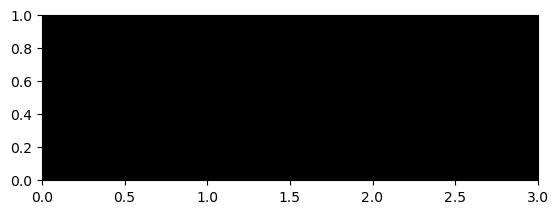

In [2]:
from pyPolyMesher.exampleDomains import MbbDomain

MbbDomain.Plot()

**Structured Mesh Generation**:
- In this example, we demonstrate the process of generating a structured mesh within the MBB domain.
- We define the dimensions of the structured mesh using parameters like `nelx` and `nely`, along with specifying the domain's size.
- The `numpy` library is used to create a grid of points within the MBB domain, ensuring a structured layout.
- We calculate the grid spacing (`dx` and `dy`) and create a mesh of points to represent the MBB domain.
- Utilizing the `PolyMesher` function, the structured mesh is generated based on the defined MBB domain and meshing parameters.
- The result is a structured mesh with information on nodes(`Nodes`), elements(`Elements`), support conditions (`Supp`), and loads (`Load`).

It: 0   Error: 1.1325011020455255e-09


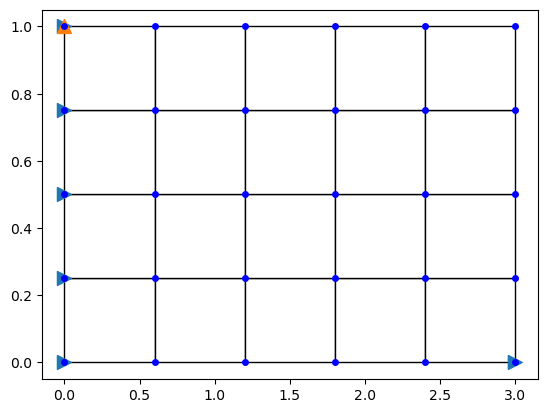

In [6]:
nelx = 5
nely = 4

dx = 3 / nelx
dy = 1 / nely

x_range = np.arange(dx / 2, 3, dx)
y_range = np.arange(dy / 2, 1, dy)

X, Y = np.meshgrid(x_range, y_range)
P = np.column_stack((X.ravel(), Y.ravel()))

Nodes, Elements, Supp, Load, P = PolyMesher(MbbDomain, 20, 30, P)